# Import Necessary Libraries

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 28.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 29.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 28.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.3 MB/s eta 0:00:

In [2]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 44.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

2024-12-08 14:07:40.775575: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 14:07:40.778419: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 14:07:40.787600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733666860.802245     118 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733666860.806701     118 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 14:07:40.821790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
# Folder path where CSV files are located
folder_path = 'Finance/US_Market/extended_stocks'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

# Loop through the list of CSV files and read each into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Extract company name from the file name (assuming file names are in the format 'company_name.csv')
    company_name = file.split(".csv")[0]
    
    # Add a new column 'Company' to identify the stock data
    df['Company'] = company_name
    
    dfs.append(df)

# Concatenate all DataFrames into one DataFrame
stock_data = pd.concat(dfs, ignore_index=True)



# Explore the Data

In [5]:
# Display the rows of the dataset
print(stock_data.head())
print(stock_data.columns)

# Verify unique companies in your dataset
print(stock_data['Company'].unique())

         Date       Open       High        Low      Close  Adj Close  \
0  1999-11-18  32.546494  35.765381  28.612303  31.473534  26.929762   
1  1999-11-19  30.713518  30.758226  28.478184  28.880545  24.711119   
2  1999-11-22  29.551144  31.473534  28.657009  31.473534  26.929762   
3  1999-11-23  30.400572  31.205294  28.612303  28.612303  24.481600   
4  1999-11-24  28.701717  29.998213  28.612303  29.372318  25.131901   

       Volume Company  
0  62546380.0       A  
1  15234146.0       A  
2   6577870.0       A  
3   5975611.0       A  
4   4843231.0       A  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')
['A' 'AA' 'AAC' ... 'STAR' 'STZ-B' 'WSO-B']


### Overview of the data structure

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083975 entries, 0 to 26083974
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Company    object 
dtypes: float64(6), object(2)
memory usage: 1.6+ GB


### Summary statistics

In [7]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.602646e+07,2.602646e+07,2.602646e+07,2.602646e+07,2.602646e+07,2.602646e+07
mean,1.434070e+09,1.462750e+09,1.397895e+09,1.427958e+09,1.002148e+09,1.286922e+06
std,2.566281e+11,2.613968e+11,2.502148e+11,2.554441e+11,1.613598e+11,1.196473e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.106839e+03,0.000000e+00
25%,6.570000e+00,7.166667e+00,6.900000e+00,7.020000e+00,4.326165e+00,1.280000e+04
50%,1.505000e+01,1.550000e+01,1.505000e+01,1.527273e+01,1.079756e+01,1.011400e+05
75%,3.112500e+01,3.192000e+01,3.095000e+01,3.144000e+01,2.524104e+01,5.660000e+05
max,9.124920e+13,9.124920e+13,8.523900e+13,8.675100e+13,4.582791e+13,7.421641e+09


# Data Cleaning

### Check for missing values

In [5]:
# Check for missing values in each column
missing_values = stock_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date             0
Open         57511
High         57511
Low          57511
Close        57511
Adj Close    57511
Volume       57511
Company          0
dtype: int64


Handle Missing values

In [6]:
# Dropping rows where any of the specified columns have NaN values
cleaned_data = stock_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
print(cleaned_data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64


### b. Verify Data Types

In [7]:
# Check data types
print(stock_data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Company       object
dtype: object


In [7]:
# Convert 'Date' to datetime 

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Check for and remove any duplicate entries.
duplicates = stock_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Remove duplicates
stock_data.drop_duplicates(inplace=True)



Number of duplicate rows: 0


### Handle Outliers

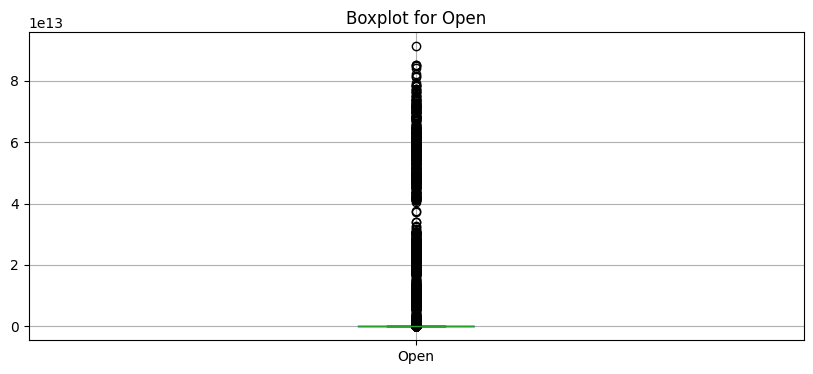

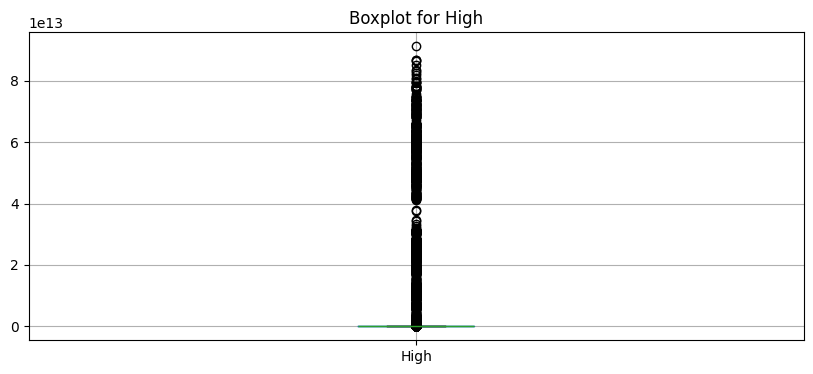

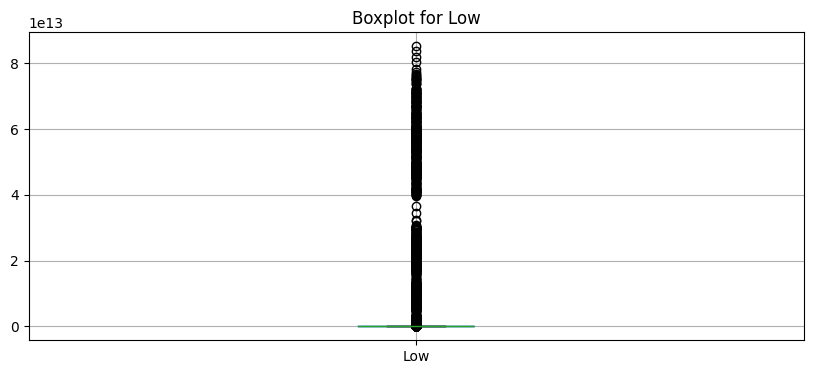

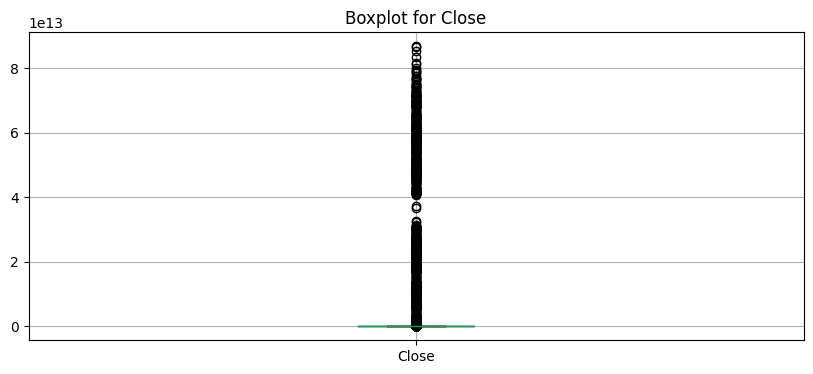

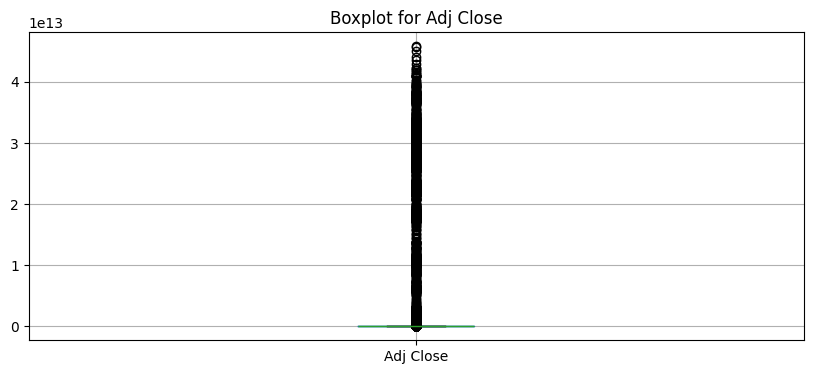

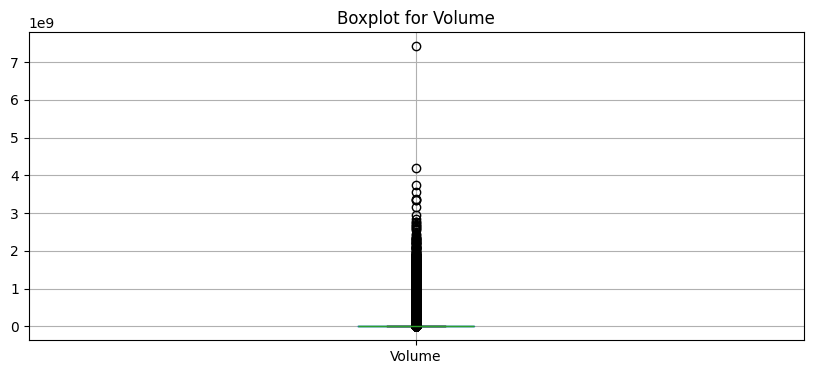

In [12]:
import matplotlib.pyplot as plt

# Plotting boxplots for numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    stock_data.boxplot(column=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


## Plotting the Data

Available Companies:
1. A
2. AA
3. AAC
4. AACG
5. AACI
6. AADI
7. AAIC
8. AAIC-PB
9. AAIC-PC
10. AAIN
11. AAL
12. AAM-PA
13. AAM-PB
14. AAMC
15. AAME
16. AAN
17. AAOI
18. AAON
19. AAP
20. AAPL
21. AAQC
22. AAT
23. AATC
24. AAU
25. AAWW
26. AB
27. ABB
28. ABBV
29. ABC
30. ABCB
31. ABCL
32. ABCM
33. ABEO
34. ABEV
35. ABG
36. ABGI
37. ABIO
38. ABM
39. ABMD
40. ABNB
41. ABOS
42. ABR
43. ABR-PD
44. ABR-PE
45. ABR-PF
46. ABSI
47. ABST
48. ABT
49. ABUS
50. ABVC
51. AC
52. ACA
53. ACAB
54. ACAC
55. ACACU
56. ACAD
57. ACAH
58. ACAQ
59. ACAX
60. ACB
61. ACBA
62. ACBAU
63. ACCD
64. ACCO
65. ACDI
66. ACEL
67. ACER
68. ACET
69. ACEV
70. ACEVU
71. ACGL
72. ACGLN
73. ACGLO
74. ACHC
75. ACHL
76. ACHR
77. ACHV
78. ACI
79. ACII
80. ACIU
81. ACIW
82. ACLS
83. ACLX
84. ACM
85. ACMR
86. ACN
87. ACNB
88. ACNT
89. ACON
90. ACOR
91. ACP
92. ACQR
93. ACQRU
94. ACR
95. ACR-PC
96. ACR-PD
97. ACRE
98. ACRO
99. ACRS
100. ACRX
101. ACST
102. ACT
103. ACTG
104. ACU
105. ACV
106. ACVA
107. ACXP
108. ADAG
109. ADAL
11

Enter the number corresponding to the company you want to plot:  234


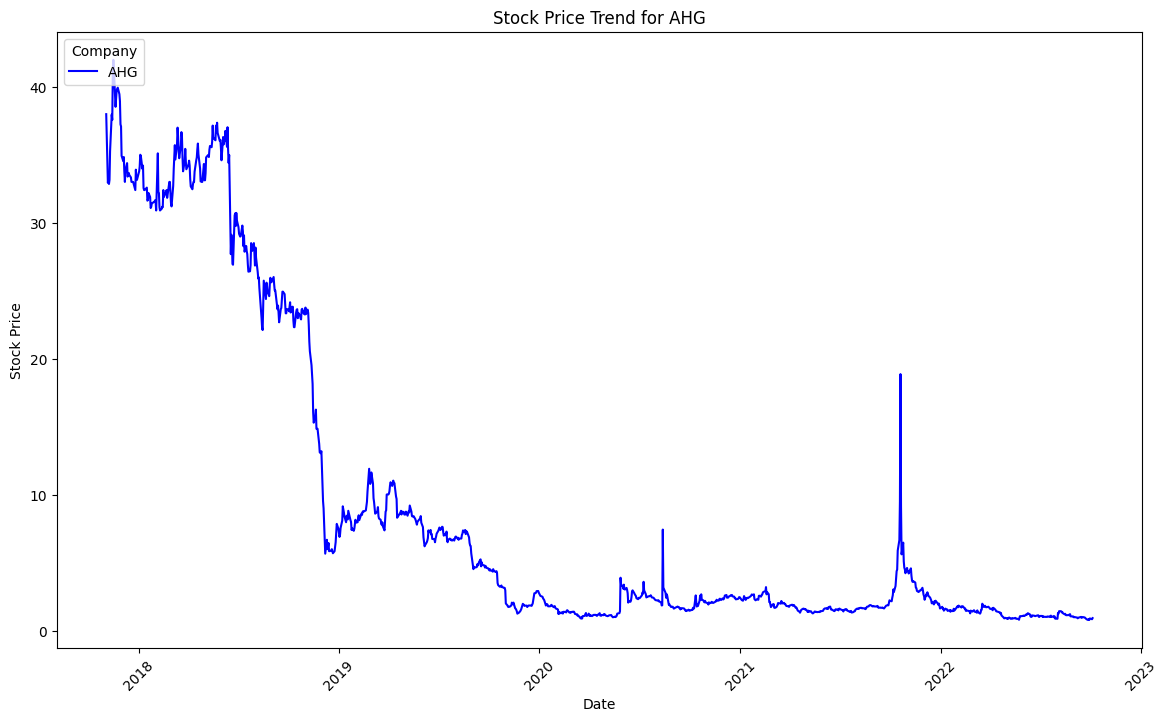

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime if not already
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort values by Date to ensure proper plotting
stock_data.sort_values(by=['Company', 'Date'], inplace=True)

# Get the unique company names
companies = stock_data['Company'].unique()

# Display the list of companies
print("Available Companies:")
for idx, company in enumerate(companies):
    print(f"{idx + 1}. {company}")

# Ask the user to select a company by entering the corresponding number
company_choice = int(input("Enter the number corresponding to the company you want to plot: ")) - 1

# Get the company name based on the user's choice
if company_choice < 0 or company_choice >= len(companies):
    print("Invalid choice. Please run the program again and select a valid option.")
else:
    company_name = companies[company_choice]
    
    # Filter the data for the specific company
    company_data = stock_data[stock_data['Company'] == company_name]
    
    # Initialize the plot
    plt.figure(figsize=(14, 8))
    
    # Plot 'Close' price against 'Date' for the specific company
    plt.plot(company_data['Date'], company_data['Close'], label=company_name, color='blue')
    
    # Add title and labels
    plt.title(f'Stock Price Trend for {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    
    # Show the legend
    plt.legend(title="Company", loc="upper left")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()


# Predicting Future Using RandomForest


## Prepare the data

In [8]:
# Feature Engineering: Add technical indicators
stock_data['MA7'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=7).mean())
stock_data['MA21'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).mean())

# Drop rows with missing values resulting from feature engineering
stock_data.dropna(inplace=True)

## Train  model

nDCG@10: 0.996457789179297
RMSE: 76.01982699443846


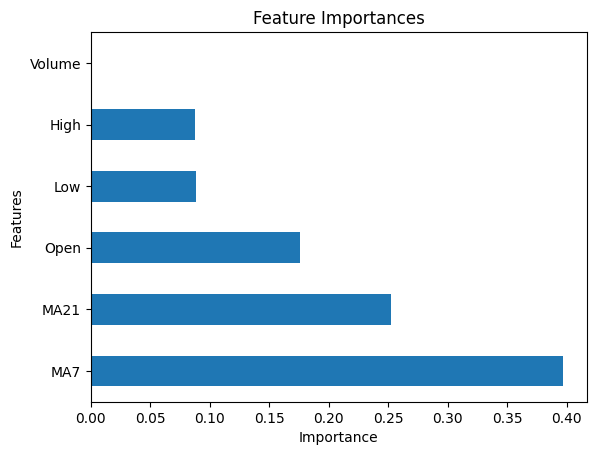

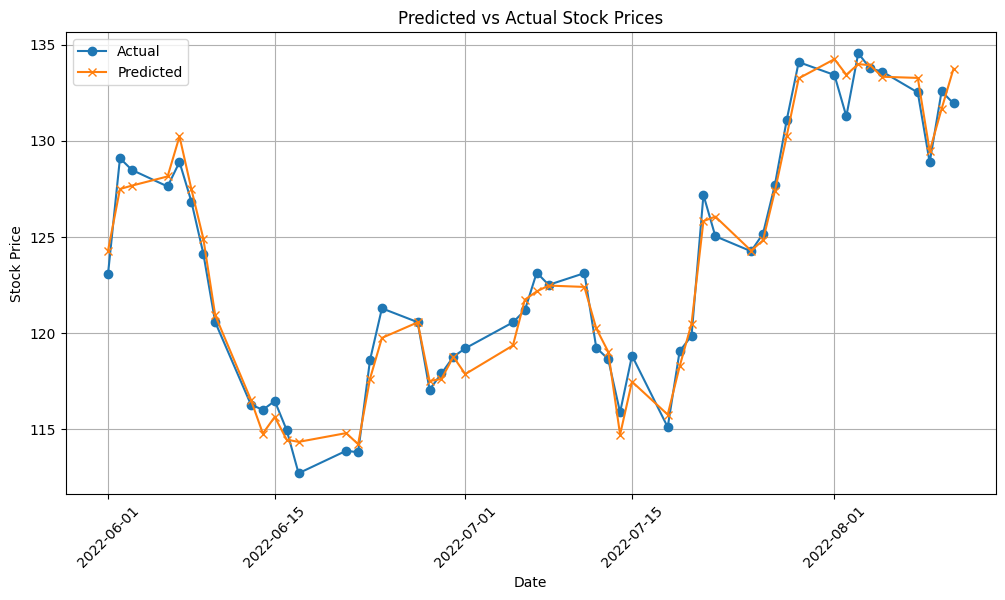

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define DCG and nDCG functions
def dcg(scores, k):
    scores = scores[:k]
    return np.sum([score / np.log2(idx + 2) for idx, score in enumerate(scores)])

def ndcg(y_true, y_pred, k=10):
    # Sort predictions and true values by predicted scores
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = np.array(y_true)[sorted_indices]
    
    # Compute DCG and IDCG
    actual_dcg = dcg(y_true_sorted, k)
    ideal_dcg = dcg(sorted(y_true, reverse=True), k)
    return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

# Feature engineering
X = stock_data[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']]
y = stock_data['Close']

# Filter dates for training and testing
train_start_date = '2019-01-01'
train_end_date = '2022-05-31'
test_start_date = '2022-06-01'
test_end_date = '2023-12-31'

train_data = stock_data[(stock_data['Date'] >= train_start_date) & (stock_data['Date'] <= train_end_date)]
test_data = stock_data[(stock_data['Date'] >= test_start_date) & (stock_data['Date'] <= test_end_date)]

# Check for missing values and remove them
train_data = train_data.dropna()
test_data = test_data.dropna()

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']])
y_train = train_data['Close'].values
X_test = scaler.transform(test_data[['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']])
y_test = test_data['Close'].values

# Hyperparameter tuning using RandomizedSearchCV (faster than GridSearchCV)
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best model after tuning
rf_model = random_search.best_estimator_
rf_model.fit(X_train, y_train)

# Predict on test data
predictions = rf_model.predict(X_test)

# Recompute Metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
ndcg_score = ndcg(y_test, predictions, k=10)

# Output Results
print(f"nDCG@10: {ndcg_score}")
print(f"RMSE: {rmse}")

# Plot feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21'])
feature_importances.nlargest(6).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Plot predicted vs actual for a small range of dates
date_range = test_data['Date'][:50]  # Select first 50 dates
plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test[:50], label='Actual', marker='o')
plt.plot(date_range, predictions[:50], label='Predicted', marker='x')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.grid()
plt.show()


## 2. Feature Engineering

In [13]:
# Price Returns
stock_data['Return'] = stock_data.groupby('Company')['Close'].pct_change()


# Moving Averages
# 7-day Moving Average
stock_data['MA7'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=7).mean())
# 21-day Moving Average
stock_data['MA21'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).mean())

# Volatility
stock_data['Volatility'] = stock_data.groupby('Company')['Return'].transform(lambda x: x.rolling(window=7).std())


#Lag Features 
# Create lag features for 'Close' price
stock_data['Close_Lag1'] = stock_data.groupby('Company')['Close'].shift(1)
stock_data['Close_Lag2'] = stock_data.groupby('Company')['Close'].shift(2)


print(stock_data.head())

         Date       Open       High        Low      Close  Adj Close  \
20 1999-12-17  33.172390  33.708870  32.501789  32.859444  28.115597   
21 1999-12-20  33.082977  33.574749  32.993561  33.530045  28.689373   
22 1999-12-21  33.395924  33.395924  32.904148  33.351215  28.536367   
23 1999-12-22  33.351215  34.021816  33.127682  34.021816  29.110157   
24 1999-12-23  33.977112  35.765381  33.932404  35.586552  30.448992   

       Volume Company  MA7  MA21    Return  Volatility  Close_Lag1  Close_Lag2  
20  3708055.0       A  NaN   NaN       NaN         NaN         NaN         NaN  
21  1196828.0       A  NaN   NaN  0.020408         NaN   32.859444         NaN  
22  2259448.0       A  NaN   NaN -0.005333         NaN   33.530045   32.859444  
23  1905754.0       A  NaN   NaN  0.020107         NaN   33.351215   33.530045  
24  2159491.0       A  NaN   NaN  0.045992         NaN   34.021816   33.351215  


## Handling Missing Values from Feature Engineering

In [14]:
# Drop rows with missing values resulting from feature engineering
stock_data.dropna(inplace=True)

print(stock_data.head())


         Date       Open       High        Low      Close  Adj Close  \
40 2000-01-18  49.087982  52.128040  48.730328  51.144493  43.760864   
41 2000-01-19  51.502148  51.502148  49.937412  50.071529  42.842800   
42 2000-01-20  50.608009  50.697426  48.283260  48.730328  41.695232   
43 2000-01-21  49.445637  49.624462  47.523247  49.177395  42.077755   
44 2000-01-24  48.998569  51.368027  48.640915  48.998569  41.924755   

       Volume Company        MA7       MA21    Return  Volatility  Close_Lag1  \
40  2101753.0       A  48.647302  44.845102  0.045704    0.038554   48.909157   
41  2624885.0       A  49.158236  45.664725 -0.020979    0.032354   51.144493   
42  2007947.0       A  49.075210  46.388548 -0.026786    0.026378   50.071529   
43  1918336.0       A  49.151850  47.142176  0.009174    0.026024   48.730328   
44  2095882.0       A  49.343450  47.855355 -0.003636    0.024383   49.177395   

    Close_Lag2  
40   48.372677  
41   48.909157  
42   51.144493  
43   50.0715

## Random Forest using Advance KPIs

RMSE: 46.96888659956185
nDCG@10: 0.9676140202236222


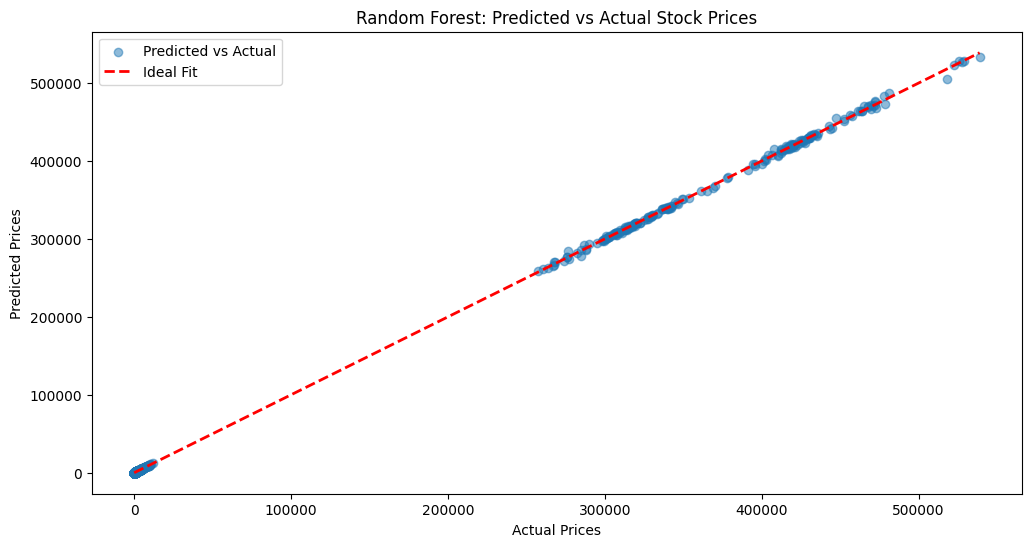

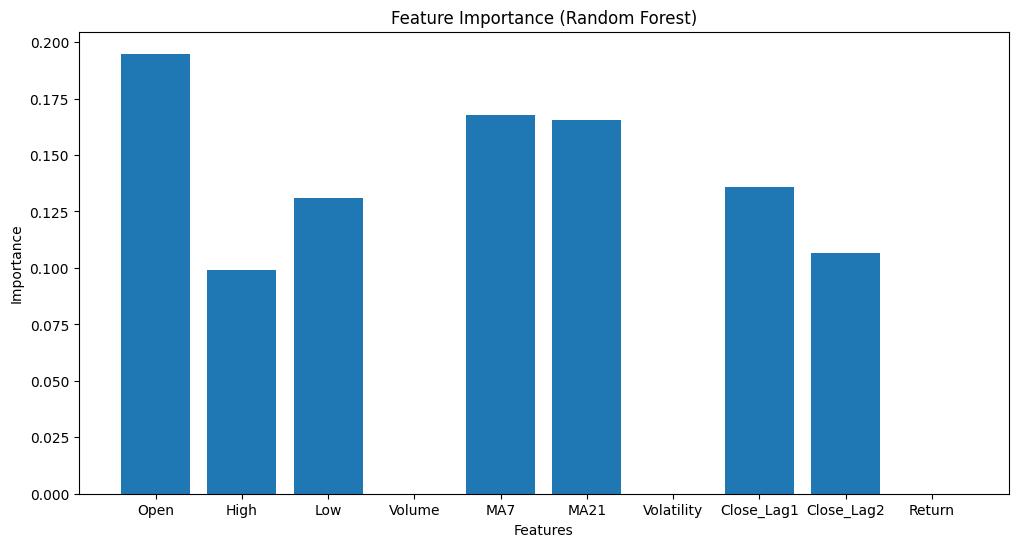

In [15]:
# Define DCG and nDCG functions
def dcg(scores):
    return np.sum([(score) / np.log2(i + 2) for i, score in enumerate(scores)])

def ndcg(predicted_scores, true_scores, k=10):
    idcg = dcg(sorted(true_scores, reverse=True)[:k])
    actual_dcg = dcg(predicted_scores[:k])
    return actual_dcg / idcg if idcg != 0 else 0

# Ensure 'Date' is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter data for 2019 to 2023
filtered_data = stock_data[(stock_data['Date'] >= '2019-01-01') & (stock_data['Date'] <= '2023-12-31')]

# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'Volatility', 'Close_Lag1', 'Close_Lag2', 'Return']
target = 'Close'

X = filtered_data[features]
y = filtered_data[target]

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate nDCG@10
# Calculate ROI for predicted and actual values
predicted_roi = np.diff(y_pred)  # Predicted ROI
actual_roi = np.diff(y_test.values)  # Actual ROI

# Sort top-10 scores for ROI
predicted_scores = np.sort(predicted_roi)[-10:]
true_scores = np.sort(actual_roi)[-10:]
ndcg_score = ndcg(predicted_scores, true_scores)
print(f"nDCG@10: {ndcg_score}")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Predicted vs Actual Stock Prices")
plt.legend()
plt.show()

# Feature importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Linear Regression Model 


## Model with Base KPIs

RMSE: 29638750019.785564
nDCG@10: 110959453.23692317


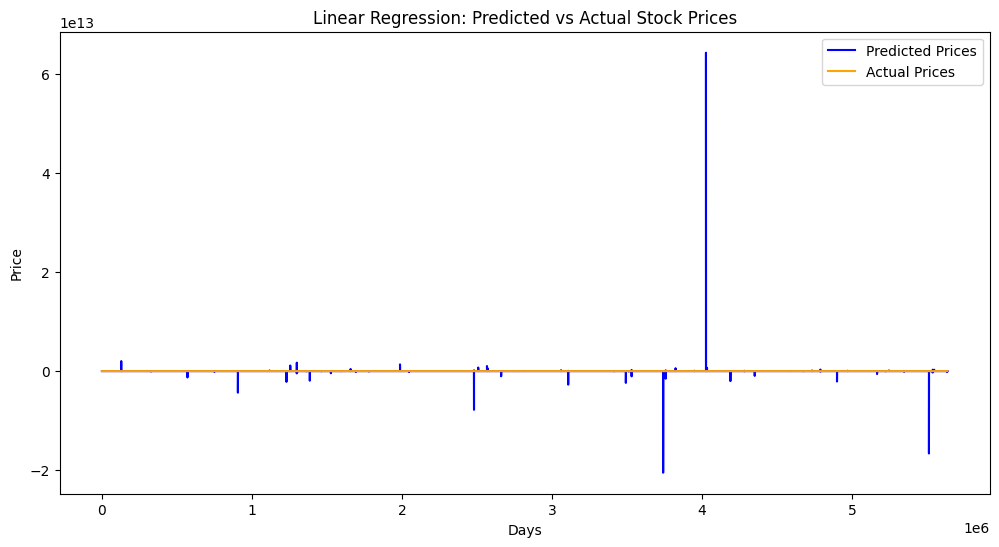

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define DCG and nDCG functions
def dcg(scores):
    return np.sum([(score) / np.log2(i + 2) for i, score in enumerate(scores)])

def ndcg(predicted_scores, true_scores, k=10):
    idcg = dcg(sorted(true_scores, reverse=True)[:k])
    actual_dcg = dcg(predicted_scores[:k])
    return actual_dcg / idcg if idcg != 0 else 0

# Load and preprocess data
# Assuming `stock_data` is your preprocessed DataFrame
# Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA7', 'MA21']

# Ensure 'Date' is in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter data for 2019 to 2023
filtered_data = stock_data[(stock_data['Date'] >= '2019-01-01') & (stock_data['Date'] <= '2023-12-31')]

# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']
target = 'Close'

X = filtered_data[features]
y = filtered_data[target]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Prepare time-series dataset for batch predictions
window_size = 30  # Number of days in each batch
future_days = 180  # Number of days to predict (6 months)

# Initialize Linear Regression model
model = LinearRegression()

# Rolling predictions
predicted_prices = []
actual_prices = []

for i in range(len(X_scaled) - window_size - future_days):
    # Train on the current batch
    X_train = X_scaled[i:i + window_size]
    y_train = y[i:i + window_size]
    
    # Test on the next day
    X_test = X_scaled[i + window_size].reshape(1, -1)
    y_test = y.iloc[i + window_size]
    
    # Fit the model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)[0]
    
    # Store predictions and actual values
    predicted_prices.append(y_pred)
    actual_prices.append(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"RMSE: {rmse}")

# Calculate nDCG@10
# Calculate ROI for predicted and actual values
predicted_roi = np.diff(predicted_prices)  # Predicted ROI
actual_roi = np.diff(actual_prices)  # Actual ROI

# Sort top-10 scores for ROI
predicted_scores = np.sort(predicted_roi)[-10:]
true_scores = np.sort(actual_roi)[-10:]
ndcg_score = ndcg(predicted_scores, true_scores)
print(f"nDCG@10: {ndcg_score}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(range(len(predicted_prices)), predicted_prices, label="Predicted Prices", color="blue")
plt.plot(range(len(actual_prices)), actual_prices, label="Actual Prices", color="orange")
plt.legend()
plt.title("Linear Regression: Predicted vs Actual Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


## Model with Advance KPIs

RMSE: 2832954025.5429387
nDCG@10: 1274380.4558041254


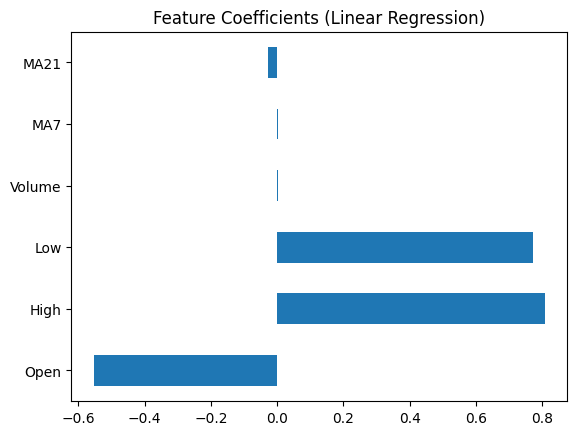

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define target and features
X = stock_data[['Open','High','Low','Volume', 'MA7', 'MA21']]
y = stock_data['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Define functions for DCG and nDCG@10 calculation
def dcg(scores):
    return np.sum([(score) / np.log2(i + 2) for i, score in enumerate(scores)])

def ndcg(predicted_scores, true_scores, k=10):
    idcg = dcg(sorted(true_scores, reverse=True)[:k])
    actual_dcg = dcg(predicted_scores[:k])
    return actual_dcg / idcg if idcg != 0 else 0

# Calculate ROI (Return on Investment) for nDCG
# Using 'Volume' as a proxy to calculate return on investment
predicted_roi = (predictions - X_test['Open']) / X_test['Open']
actual_roi = (y_test - X_test['Open']) / X_test['Open']

# Replace inf/nan values in ROI calculations
predicted_roi.replace([np.inf, -np.inf], np.nan, inplace=True)
actual_roi.replace([np.inf, -np.inf], np.nan, inplace=True)
predicted_roi.dropna(inplace=True)
actual_roi.dropna(inplace=True)

# Calculate top-10 predicted and true scores
predicted_scores = predicted_roi.sort_values(ascending=False).head(10).tolist()
true_scores = actual_roi.sort_values(ascending=False).head(10).tolist()
ndcg_score = ndcg(predicted_scores, true_scores)

print(f"nDCG@10: {ndcg_score}")

# Plot Feature Coefficients for Linear Regression
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.plot(kind='barh', title="Feature Coefficients (Linear Regression)")
plt.show()
